In [55]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def load_results_dict(dir, filename):
    with open(dir+'/'+filename, 'rb') as f:
        results = pkl.load(f)
    return results

date = '2024-09-24'
dir = 'heterogeneity_results'
fixed_name = '_single_task_exp_'
suffix = ''
filenames = {
    'ddn': {
        'distributed': {
            'cluster': date + fixed_name + 'DDN_dist_decay_per_cluster' + suffix + '.p',
            'network': date + fixed_name + 'DDN_dist_decay_net_wide' + suffix + '.p'
        },
        'fixed': {
            'cluster': date + fixed_name + 'DDN_fixed_decay_per_cluster' + suffix + '.p',
            'network': date + fixed_name + 'DDN_fixed_decay_net_wide' + suffix + '.p',
        }
    },
    'esn': {
        'distributed': {
            'cluster': date + fixed_name + 'BL_dist_decay_per_cluster' + suffix + '.p',
            'network': date + fixed_name + 'BL_dist_decay_net_wide' + suffix + '.p',
        },
        'fixed': {
            'cluster': date + fixed_name + 'BL_fixed_decay_per_cluster' + suffix + '.p',
            'network': date + fixed_name + 'BL_fixed_decay_net_wide' + suffix + '.p',
        }
    }
}

In [56]:
results_dicts = {}
for factor_1 in filenames:
    results_dicts[factor_1] = {}
    for factor_2 in filenames[factor_1]:
        results_dicts[factor_1][factor_2] = {}
        for factor_3 in filenames[factor_1][factor_2]:
            print('loading: ' + filenames[factor_1][factor_2][factor_3])
            results_dicts[factor_1][factor_2][factor_3] = load_results_dict(dir, filenames[factor_1][factor_2][factor_3])

loading: 2024-09-24_single_task_exp_DDN_dist_decay_per_cluster.p
loading: 2024-09-24_single_task_exp_DDN_dist_decay_net_wide.p
loading: 2024-09-24_single_task_exp_DDN_fixed_decay_per_cluster.p
loading: 2024-09-24_single_task_exp_DDN_fixed_decay_net_wide.p
loading: 2024-09-24_single_task_exp_BL_dist_decay_per_cluster.p
loading: 2024-09-24_single_task_exp_BL_dist_decay_net_wide.p
loading: 2024-09-24_single_task_exp_BL_fixed_decay_per_cluster.p
loading: 2024-09-24_single_task_exp_BL_fixed_decay_net_wide.p


In [57]:
# dict keys example
print(results_dicts['ddn']['distributed']['cluster'].keys())

dict_keys(['validation performance', 'parameters', 'evolutionary strategy', 'cma stds', 'example net', 'train data', 'validation data', 'alphas', 'start net'])


## Evolution 

In [61]:
def get_validation_throughout_evolution(dict):
    # Validation scores are saved in a matrix with dimensions:
    # generations x hyperparameter candidates x re-initializations x lag search grid
    all_scores = dict['validation performance']
    
    # from the lag search grid we select the best score (lowest NRMSE), since this was the best 
    # performing readout model
    best_lag_scores = np.min(all_scores, axis=-1)
    
    # from the re-initializations from the same hyperparameter set/candidate, we take the average
    best_candidate_scores = np.mean(best_lag_scores, axis=-1)
    
    # from the population of hyperparameter candidates, we select the best candidate
    best_gen_scores = np.min(best_candidate_scores, axis=-1)
    
    return best_gen_scores

In [62]:
val_scores = {}
for factor_1 in results_dicts:
    val_scores[factor_1] = {}
    for factor_2 in results_dicts[factor_1]:
        val_scores[factor_1][factor_2] = {}
        for factor_3 in results_dicts[factor_1][factor_2]:
            val_scores[factor_1][factor_2][factor_3] = get_validation_throughout_evolution(results_dicts[factor_1][factor_2][factor_3])

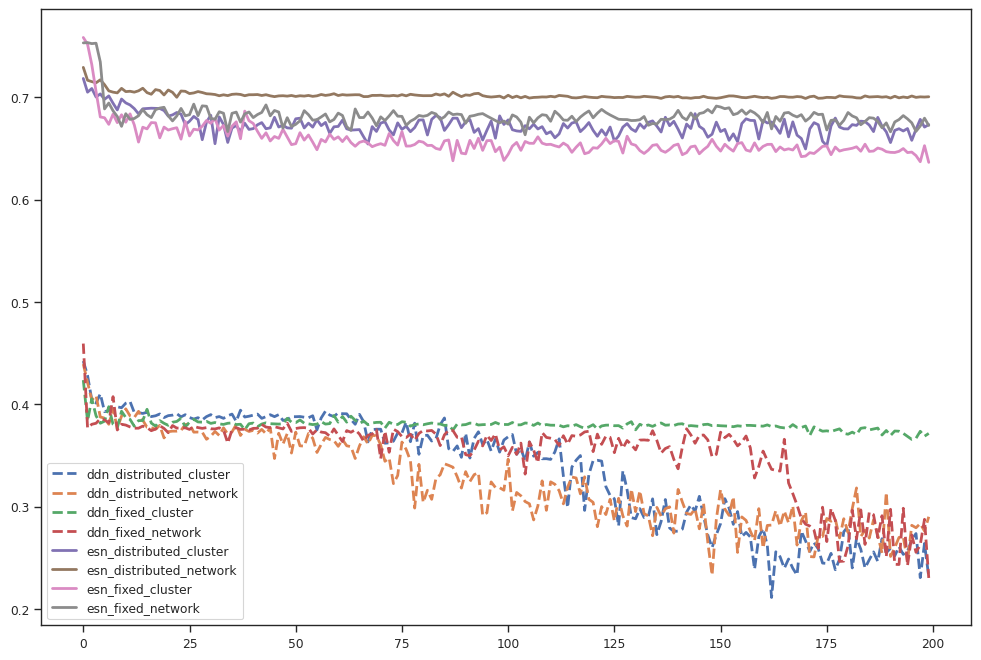

In [63]:
sns.set_theme(style="ticks", font_scale=1, palette='deep', context='paper')

plt.figure(figsize=(12,8))
gen_start = 0
gen_end = 200
for factor_1 in val_scores:
    for factor_2 in val_scores[factor_1]:
        for factor_3 in val_scores[factor_1][factor_2]:
            line = '-'
            if factor_1 == 'ddn':
                line = '--'
            plt.plot(val_scores[factor_1][factor_2][factor_3][gen_start:gen_end], label=factor_1 + '_' + factor_2 + '_' + factor_3, linestyle=line, linewidth=2)
            
plt.legend()